In [11]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

In [12]:
X, y = fetch_olivetti_faces(return_X_y=True, shuffle=False)
y ## 40 different people * 10 faces each are in this dataset. y carries the people names.


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [13]:
X[1] # second data from the dataset. 4096-long vector

array([0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
       0.15289256], dtype=float32)

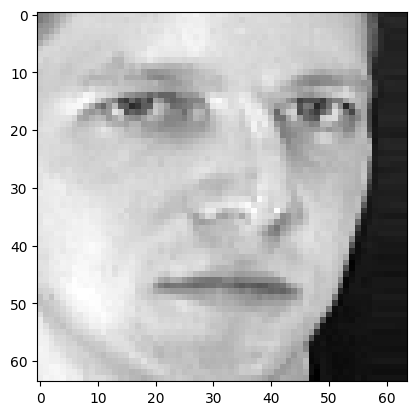

In [14]:
plt.imshow(X[1].reshape(64,64),cmap=plt.cm.gray)   # showing X[1], reshaped into 64*64 matrix

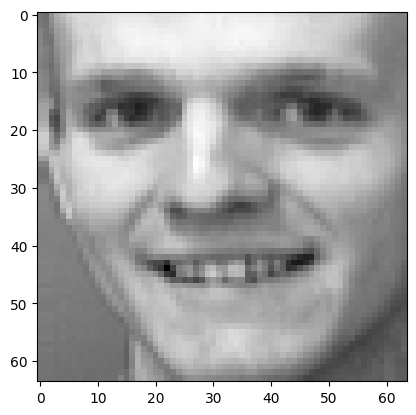

In [15]:
plt.imshow(X[40].reshape(64,64),cmap=plt.cm.gray)   # showing another face.

In [16]:
k = 5

N, D = X.shape
Z = X - np.outer(np.ones(N), np.mean(X, axis= 0))

Q = 1/(N + 1) * np.matmul(Z.T, Z)
sigma, v = np.linalg.eig(Q)

ind = np.argpartition(sigma, -k)[-k:]
B = v[:, ind]
X_new = np.matmul(X, B)
X_new_projected_to_old = np.matmul(X_new, B.T)


C:\Users\t\AppData\Local\Temp\ipykernel_16540\3882380638.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ax2.imshow(X_new_projected_to_old[picture_number].reshape(64, 64).astype(float), cmap=plt.cm.gray)


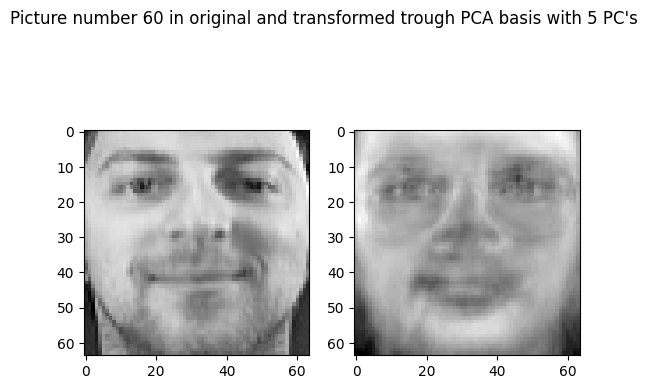

In [24]:
picture_number = 60
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"Picture number {picture_number} in original and transformed trough PCA basis with {k} PC's")
ax1.imshow(X[picture_number].reshape(64,64),cmap=plt.cm.gray)
ax2.imshow(X_new_projected_to_old[picture_number].reshape(64, 64).astype(float), cmap=plt.cm.gray)

C:\Users\t\AppData\Local\Temp\ipykernel_16540\910411080.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  ax3.imshow(X_new_projected_to_old[0].reshape(64, 64).astype(float), cmap=plt.cm.gray)
C:\Users\t\AppData\Local\Temp\ipykernel_16540\910411080.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ax4.imshow(X_new_projected_to_old[1].reshape(64, 64).astype(float), cmap=plt.cm.gray)


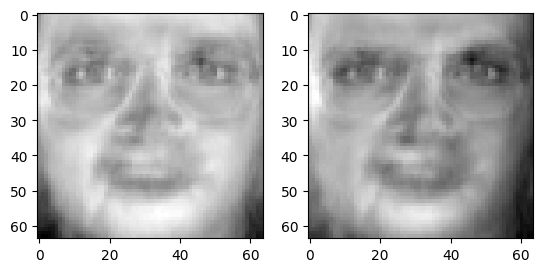

In [25]:
#Because the transformed picture seems not to differ so much if you change the picture_number,
#here´s a direct comparison between two transformed pictures
fig, (ax3, ax4) = plt.subplots(1, 2)
ax3.imshow(X_new_projected_to_old[0].reshape(64, 64).astype(float), cmap=plt.cm.gray)
ax4.imshow(X_new_projected_to_old[1].reshape(64, 64).astype(float), cmap=plt.cm.gray)

(400, 6)


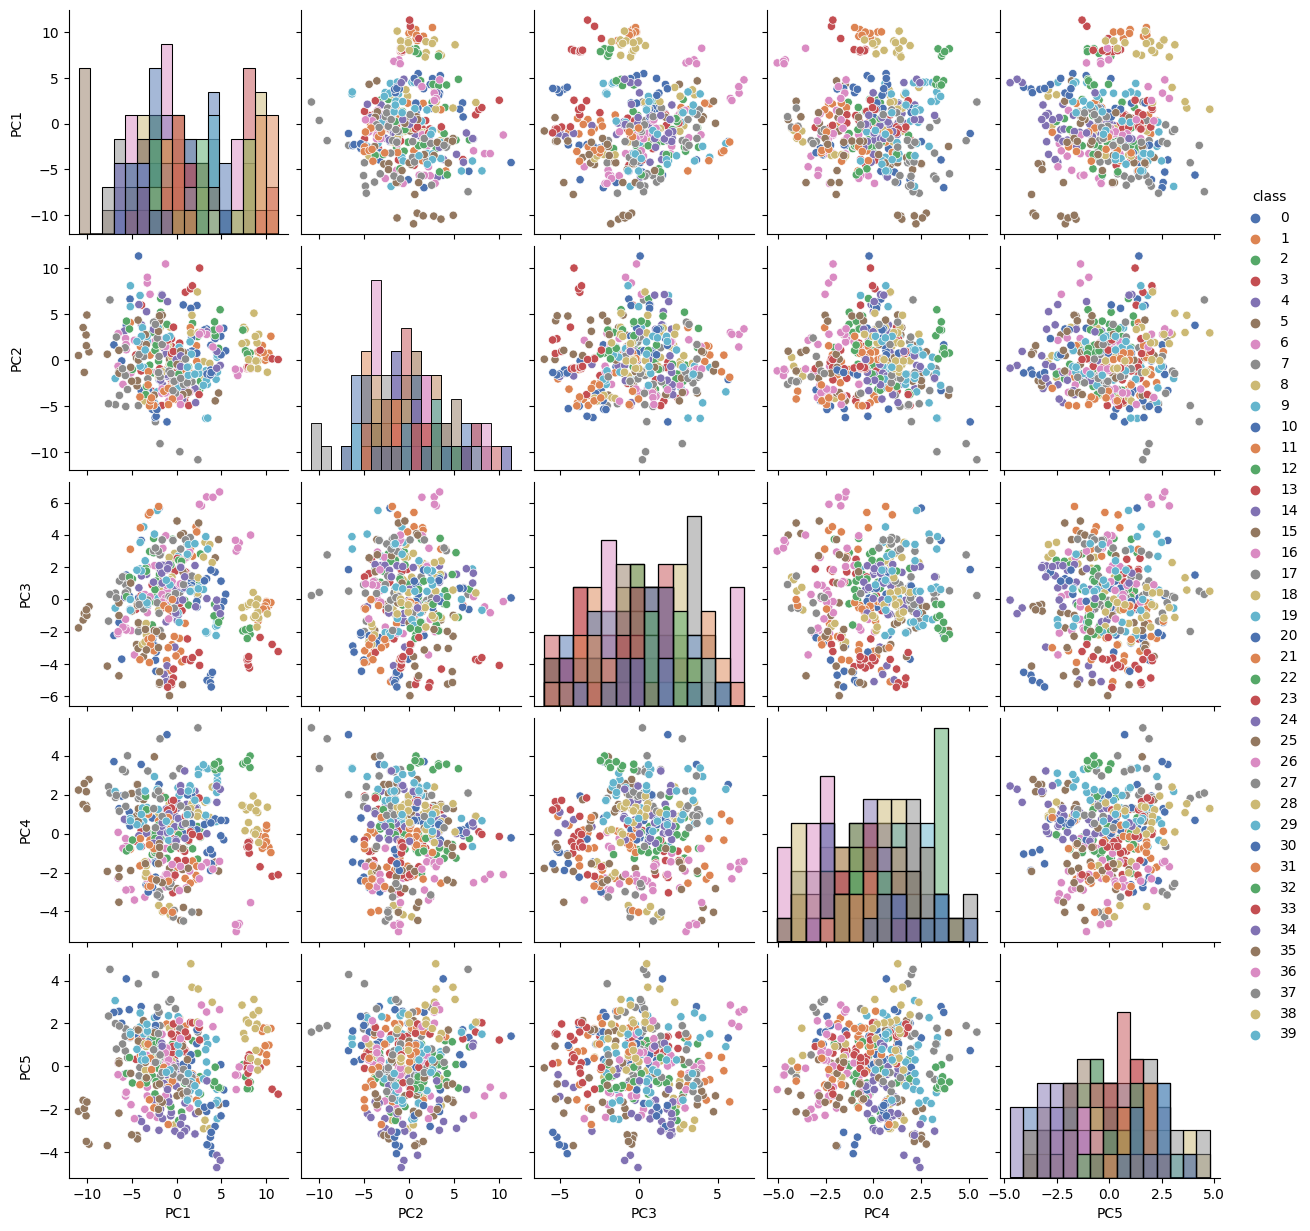

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)   
X_new = pca.fit_transform(X)

df = pd.DataFrame(data=X_new, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
df["class"] = y
print(df.shape)
sns.pairplot(df, diag_kind="hist", hue="class", palette='deep')   
